In [11]:
import numpy as np
import scipy as sp
from tqdm import tqdm

In [2]:
# def mat_counts(p, r):
#     m = len(p)
#     n = len(r)
   
#     def vect_binom(a, b):
#         return np.prod([sp.special.binom(a[i], b[i]) for i in  range(len(a))])
        
#     def over(r, s):
#         return r - s + np.concatenate((s[1:], [0]))

#     ans=[]
#     def gen(i, r, l, p):
#         global ans
#         if i == len(r):
#             if np.sum(ans) == p:
#                 l.append(np.array(ans[0:]))
#             return
#         for j in range(r[i]+1):
#             ans.append(j)
#             gen(i+1, r, l, p)
#             ans.pop()
            
#     def C(r, p):
#         l = []
#         gen(0, r, l, p)
#         return l

#     if p.size == 0:
#         return 1
#     sum = 0
#     for s in C(r, p[0]):
#         sum += vect_binom(r, s) * mat_counts(p[1:], over(r, s))
#     return sum

# def mat_counts_start(p, q):
#     m = len(p)
#     r =  np.array([list(q).count(i) for i in range(1, m)])
   
#     def vect_binom(a, b):
#         return np.prod([sp.special.binom(a[i], b[i]) for i in  range(len(a))])
        
#     def over(r, s):
#         return r - s + np.concatenate((s[1:], [0]))

#     ans=[]
#     def gen(i, r, l, p, ans):

#         if i == len(r):
#             if np.sum(ans) == p:
#                 l.append(np.array(ans[0:]))
#             return
#         for j in range(r[i]+1):
#             ans.append(j)
#             gen(i+1, r, l, p)
#             ans.pop()
            
    
#     l = []
#     gen(0, r, l, p, ans)
    

#     if p.size == 0:
#         return 1
#     sum = 0
#     for s in l:
#         sum += vect_binom(r, s) * mat_counts(p[1:], over(r, s))
#     return sum

In [12]:

def q_to_counts(a,m):
    return np.array([list(a).count(i) for i in range(1, m)])

def vect_binom(a, b):
    return np.prod([sp.special.binom(a[i], b[i]) for i in  range(len(a))])
    
def over(r, s):
    return r - s + np.concatenate((s[1:], [0]))

ans=[]
def gen(i, r, l, p):
    global ans
    if i == len(r):
        if np.sum(ans) == p:
            l.append(np.array(ans[0:]))
        return
    for j in range(r[i]+1):
        ans.append(j)
        gen(i+1, r, l, p)
        ans.pop()
        
def C(r, p):
    l = []
    gen(0, r, l, p)
    return l

def mat_counts(p, r):
    
    if p.size == 0:
        return 1
    sum = 0
    
    for s in C(r, p[0]):
        sum += vect_binom(r, s) * mat_counts(p[1:], over(r, s))
    return sum

In [13]:
p = np.array([2, 2, 1, 1])
q = np.array([3, 2, 1])
mat_counts(p,q_to_counts(q,len(p)))

8.0

In [14]:
import matplotlib.pyplot as plt
import time 

times = []
counts = []
N = 10

for i in tqdm(range(2,N)):
    p = np.random.randint(0,i-1,size=i)
    q = np.ones(i)*(i-1) - p 
    t1 = time.time()
    m = 0 
    for i in range(100):
        m += float(mat_counts(p,q_to_counts(q,len(p))))
    times.append((time.time()-t1)/10)
    counts.append(m/10)




 75%|███████▌  | 6/8 [00:22<00:11,  5.81s/it]

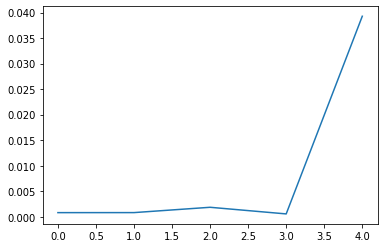

In [30]:
plt.plot(times[:-2])

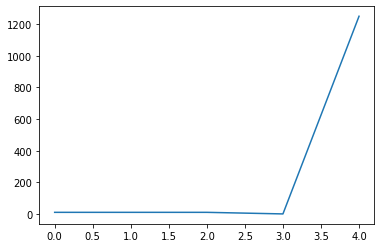

In [31]:
plt.plot(counts[:-2])

In [ ]:
import numpy as np
import scipy as sp

In [ ]:
p = np.array([2, 2, 1, 1])
q = np.array([3, 2, 1])
m = len(p)
n = len(q)

def q_to_counts(a):
    return np.array([list(a).count(i) for i in range(1, m)])

def vect_binom(a, b):
    return np.prod([sp.special.binom(a[i], b[i]) for i in  range(len(a))])
    
def over(r, s):
    return r - s + np.concatenate((s[1:], [0]))

ans=[]
def gen(i, r, l, p):
    global ans
    if i == len(r):
        if np.sum(ans) == p:
            l.append(np.array(ans[0:]))
        return
    for j in range(r[i]+1):
        ans.append(j)
        gen(i+1, r, l, p)
        ans.pop()
        
def C(r, p):
    l = []
    gen(0, r, l, p)
    return l

def N(p, r):
    if p.size == 0:
        return 1
    sum = 0
    for s in C(r, p[0]):
        sum += vect_binom(r, s) * N(p[1:], over(r, s))
    return sum

In [ ]:
N(p, q_to_counts(q))